Found 3284 images belonging to 4 classes.
Found 936 images belonging to 4 classes.
Found 468 images belonging to 4 classes.
Epoch 1/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 402s 3s/step - accuracy: 0.2401 - loss: 1.4515 - val_accuracy: 0.2500 - val_loss: 1.3876
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.2462 - loss: 1.4181
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


103/103 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.2563 - loss: 1.4037 - val_accuracy: 0.2500 - val_loss: 1.3864
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.2466 - loss: 1.3999
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.2616 - loss: 1.3908 - val_accuracy: 0.2500 - val_loss: 1.3865
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.2568 - loss: 1.3958
Epoch 7/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.2695 - loss: 1.3867 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 8/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.2501 - loss: 1.3900
Epoch 9/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.2570 - loss: 1.3880 - val_accuracy: 0.2500 - val_loss: 1.3862
Epoch 10/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.2703 - loss: 1.3855
Epoch 11/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.2497 - loss: 1.3899 - val_accuracy: 0.2500 - val_loss: 1.3863
Epoch 12

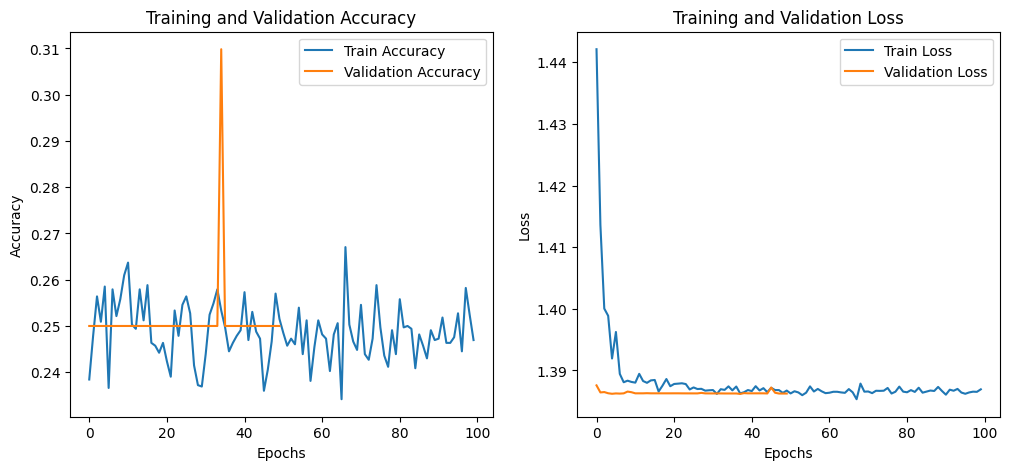

468/468 ━━━━━━━━━━━━━━━━━━━━ 46s 68ms/step


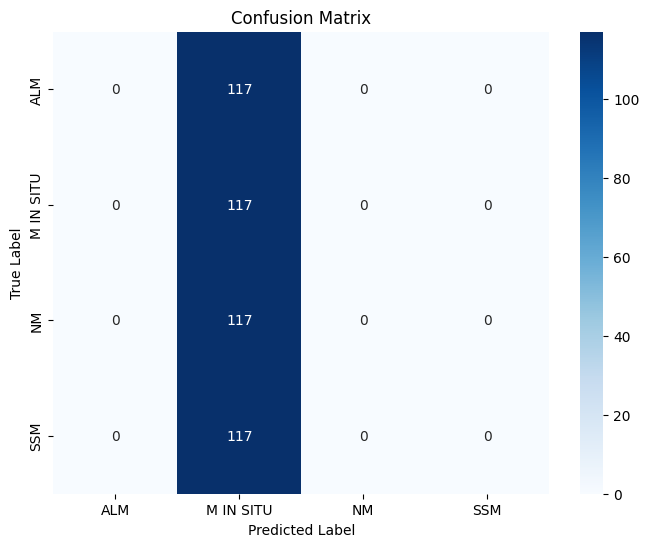

Classification Report:
              precision    recall  f1-score   support

         ALM       0.00      0.00      0.00       117
   M IN SITU       0.25      1.00      0.40       117
          NM       0.00      0.00      0.00       117
         SSM       0.00      0.00      0.00       117

    accuracy                           0.25       468
   macro avg       0.06      0.25      0.10       468
weighted avg       0.06      0.25      0.10       468



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 100

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Fixed generators - removed duplicate parameters and fixed syntax
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/skin-cancer/New Balance/TRAIN',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    '/kaggle/input/skin-cancer/New Balance/VALID',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/skin-cancer/New Balance/TEST',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Load Pretrained EfficientNetB7 Model
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze base model

# Add Custom Classification Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model - fixed validation_steps syntax
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    steps_per_epoch=None,
    validation_steps=len(valid_generator)
)

# Save the Model
model.save('efficientnetb7_skin_cancer.h5')

# Plot Training Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate Model and Generate Confusion Matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_labels))